In [1]:
from func import *
from models import apply_models
#from feat_sel import prepare_feat_fulldf as pfull
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from feat_sel import prep_select_features

In [2]:
d13b_beh=studVle('DDD','2013B')#.apply(pd.to_numeric,downcast='integer')
d13b_ass=StuAssessemnts('DDD','2013B') #d13b_ass2=StuAssessemnts('DDD','2013B',False)


In [ ]:
'''
d13b_ass_until=combine_weeks_ass_until(d13b_ass) #d13b_ass_until=combine_until(d13b_ass)
d13b_ass_until.keys()
d13b_ass_until[11].head(2)
'''

In [3]:
d13b_ass_until2=combine_until(d13b_ass)
d13b_ass_until2.keys()

dict_keys([3, 7, 11, 16, 21, 24, 28, 29, 34])

In [4]:
d13b_ass_until2[11].head(2)

assessment_type,w3,w7,w11
id_student,,,
40419,7.040,0.00,0.00
41060,7.915,11.42,14.07


In [5]:
d13b_unitlAss_beh=comVleAss(d13b_beh,d13b_ass_until2)

In [6]:
d13b_unitlAss_beh.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

In [52]:
d13b_unitlAss_beh[7].head(2)

,externalquiz,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,w3,w7
id_student,,,,,,,,,,,,,
40419,1,56,0,22,9,6,7,0,3,19,11,7.040,0.00
41060,3,16,0,28,52,0,11,0,12,34,2,7.915,11.42


In [8]:
d13b_stuinfo=stuInfo('DDD','2013B',True)

In [ ]:
#d13b_vle_info=comb_info(d13b_beh,d13b_stuinfo)

In [ ]:
#del d13b_vle_info

In [9]:
d13_vles_ass_combined=combine_vles_ass(d13b_beh,d13b_ass)

In [10]:
df_approach1=comb_info(d13_vles_ass_combined,d13b_stuinfo)

In [11]:
df_approach2=comb_info(d13b_unitlAss_beh,d13b_stuinfo)

In [53]:
df_approach1[7].head(5)

,externalquiz,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,w7,final_result
id_student,,,,,,,,,,,,,
40419,1,56,0,22,9,6,7,0,3,19,11,0.00,1
41060,3,16,0,28,52,0,11,0,12,34,2,11.42,1
43284,7,51,0,100,90,12,18,0,18,30,11,10.97,1
45664,6,104,0,112,55,0,29,2,49,70,37,4.60,0
52014,6,26,0,47,31,0,20,0,5,12,3,8.59,1


In [13]:
df_approach2[7].head(2)

,externalquiz,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,w3,w7,final_result
id_student,,,,,,,,,,,,,,
40419,1,56,0,22,9,6,7,0,3,19,11,7.040,0.00,1
41060,3,16,0,28,52,0,11,0,12,34,2,7.915,11.42,1


In [ ]:
'''
d13b_vle_ass=combine_vles_ass(d13b_beh,d13b_ass)
d13b_VleAssInfo=comb_info(d13b_vle_ass,d13b_stuinfo)
fdf=finalize_df(d13b_ass_until2,d13b_beh)
'''

In [ ]:
d13b_VleAssInfo[3].sample(n=10).to_csv('week2_sample.csv')

In [ ]:
def selprep(week_data,func,k=5):
    wcols=[]
    for col in week_data.columns.tolist():
        if 'w'  in col[0]:
            wcols.append(col)
    #difdcols=week_data.columns.difference(wcols)
    if not wcols:
        subdata=week_data[week_data.columns.difference(wcols).tolist()]
        selcols=prep_select_features(subdata,func=func,k=k)
        selcols.extend(wcols)
        selcols.append('final_result')
    else:
        selcols=prep_select_features(week_data,func=func,k=k)
        selcols.append('final_result')
            
    return week_data[selcols]

    #return wcols,difdcols


In [ ]:
del selprep

In [ ]:
print(selprep(df_approach1[7],k=5,func=f_classif))

In [ ]:
print(selprep(df_approach2[7],k=5,func=f_classif))

In [ ]:
apr1wd7=selprep(df_approach1[7],k=5,func=f_classif)

In [ ]:
apr1wd7.head(2)

In [ ]:
apr2wd7=selprep(df_approach2[7],k=5,func=f_classif)
apr2wd7.head(2)

In [29]:
import matplotlib as mpl

In [44]:
def draw_res(resDf,yl,s=1):
    valid_markers = ([item[0] for item in mpl.markers.MarkerStyle.markers.items() if
    item[1] != 'nothing' and not item[1].startswith('tick') and not item[1].startswith('caret')])
    markers = np.random.choice(valid_markers, resDf.shape[1], replace=False)
    mpl.pyplot.rcParams["figure.dpi"] = 300
    ax = resDf.plot(kind='line')
    for i, line in enumerate(ax.get_lines()):
        line.set_marker(markers[i])
    if s==1:
        mpl.pyplot.title('Strategy 1 - Weeks 1-34') 
    else:
        mpl.pyplot.title('Strategy 2 - Weeks 1-34') 

    mpl.pyplot.xlabel('week')
    mpl.pyplot.ylabel(yl)
    # adding legend
    ax.legend(ax.get_lines(), resDf.columns, loc='best')
    mpl.pyplot.show()

In [23]:
#applying models on full data  for both approaches, 1 and 2.
def get_results_dfs(weeks_dfs):
    acc_dic={}
    f1_dic={}
    for k in weeks_dfs.keys():
        #apr1dic[k]=apply_models(df_approach1[k])
        r1,r2=apply_models(weeks_dfs[k])
        acc_dic[k]=r1
        f1_dic[k]=r2
    #apr1dic
    acc_df=pd.DataFrame.from_dict(acc_dic,orient='index')
    f1_df=pd.DataFrame.from_dict(f1_dic,orient='index')
    return  acc_df,f1_df

In [21]:
#approach 1
apr1_acc_df=pd.DataFrame.from_dict(apr1_acc_dic,orient='index')
apr1_f1_df=pd.DataFrame.from_dict(apr1_f1_dic,orient='index')

In [15]:
apr1_acc_dic

{1: {'NB': 0.607, 'RF': 0.607, 'LR': 0.602},
 2: {'NB': 0.619, 'RF': 0.633, 'LR': 0.631},
 3: {'NB': 0.674, 'RF': 0.74, 'LR': 0.749},
 4: {'NB': 0.634, 'RF': 0.66, 'LR': 0.649},
 5: {'NB': 0.641, 'RF': 0.656, 'LR': 0.649},
 6: {'NB': 0.65, 'RF': 0.657, 'LR': 0.652},
 7: {'NB': 0.692, 'RF': 0.783, 'LR': 0.793},
 8: {'NB': 0.64, 'RF': 0.662, 'LR': 0.651},
 9: {'NB': 0.65, 'RF': 0.662, 'LR': 0.658},
 10: {'NB': 0.646, 'RF': 0.664, 'LR': 0.658},
 11: {'NB': 0.711, 'RF': 0.822, 'LR': 0.827},
 12: {'NB': 0.648, 'RF': 0.699, 'LR': 0.652},
 13: {'NB': 0.657, 'RF': 0.691, 'LR': 0.666},
 14: {'NB': 0.659, 'RF': 0.699, 'LR': 0.669},
 15: {'NB': 0.664, 'RF': 0.705, 'LR': 0.673},
 16: {'NB': 0.739, 'RF': 0.845, 'LR': 0.848},
 17: {'NB': 0.672, 'RF': 0.713, 'LR': 0.709},
 18: {'NB': 0.68, 'RF': 0.737, 'LR': 0.733},
 19: {'NB': 0.678, 'RF': 0.744, 'LR': 0.738},
 20: {'NB': 0.685, 'RF': 0.766, 'LR': 0.753},
 21: {'NB': 0.778, 'RF': 0.851, 'LR': 0.867},
 22: {'NB': 0.696, 'RF': 0.777, 'LR': 0.766},
 23

In [34]:
#acc_app1_df,f1_app1_df=get_results_dfs(df_approach1)
acc_app1_df,f1_app1_df=pd.DataFrame.from_dict(apr1_acc_dic,orient='index'),pd.DataFrame.from_dict(apr1_f1_dic,orient='index')


In [46]:
#pd.DataFrame.from_dict(apr1_f1_dic,orient='index').head(5)
acc_app1_df.head(5)

,NB,RF,LR
1,0.607,0.607,0.602
2,0.619,0.633,0.631
3,0.674,0.740,0.749
4,0.634,0.660,0.649
5,0.641,0.656,0.649


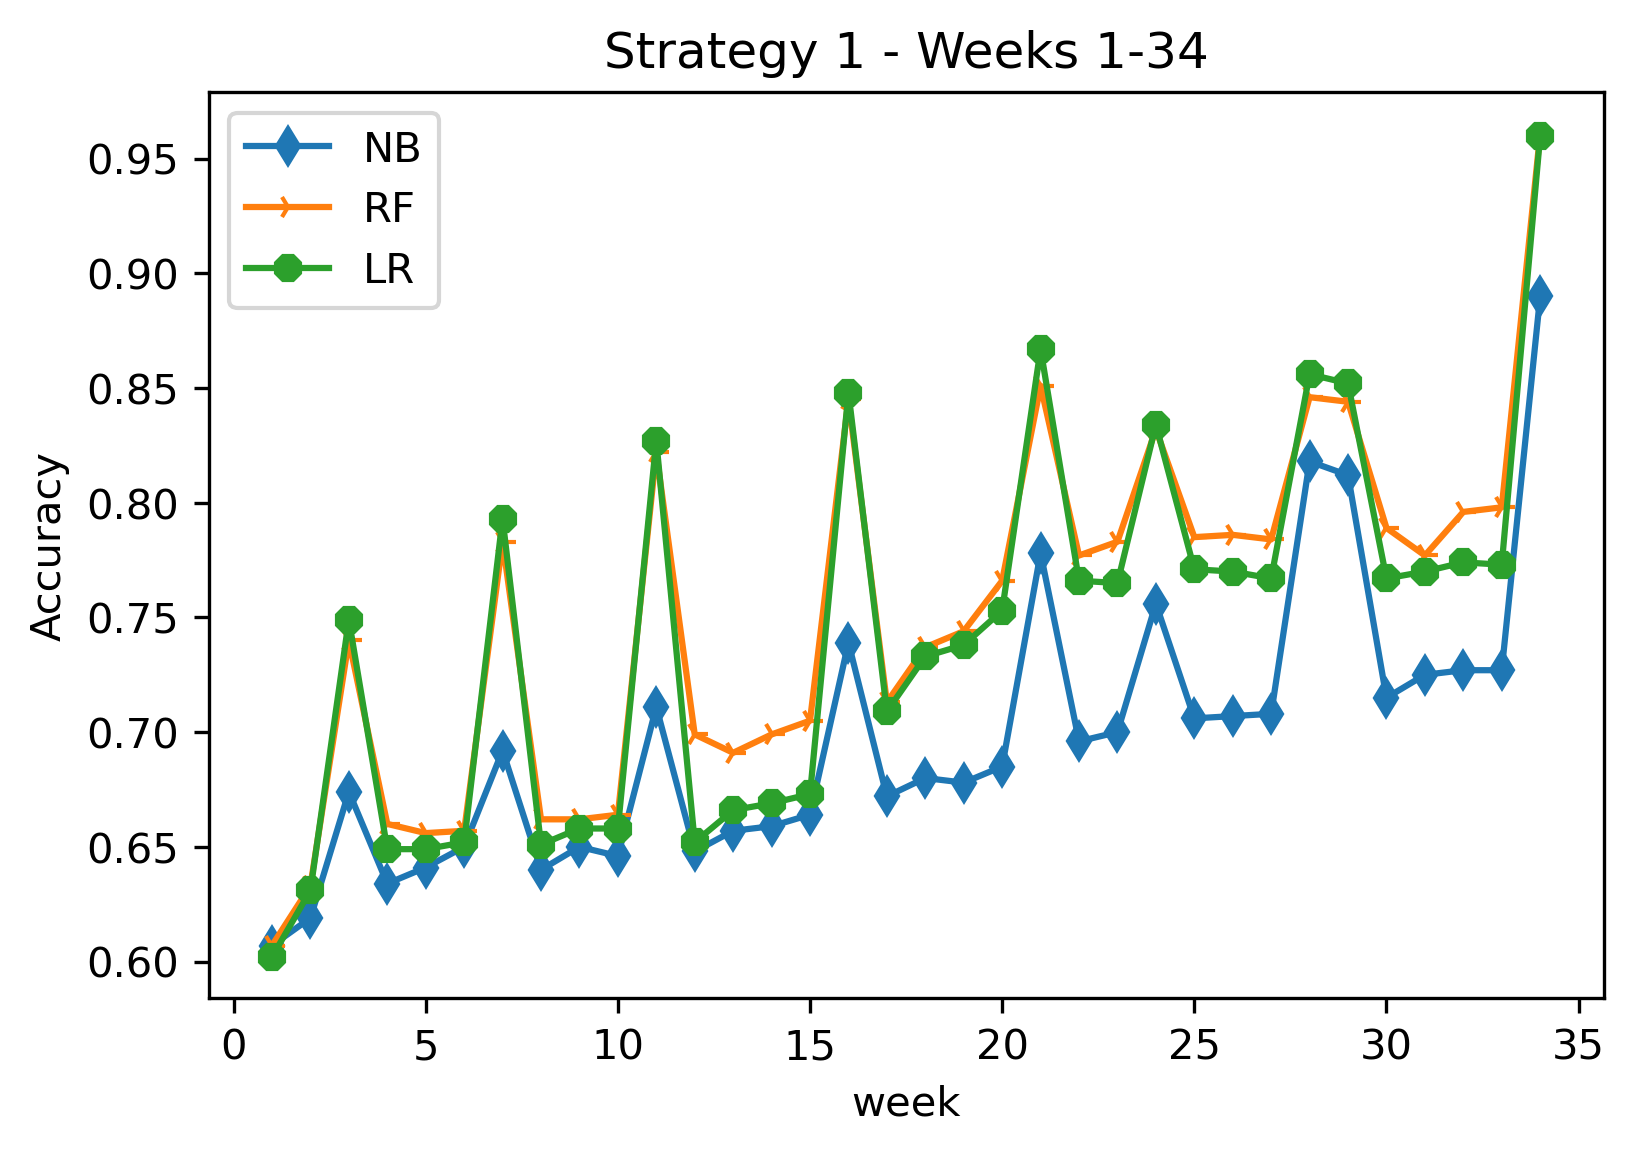

In [41]:
draw_res(acc_app1_df,'Accuracy')

In [37]:
f1_app1_df.head(3)

,NB,RF,LR
1,0.696,0.636,0.694
2,0.712,0.677,0.717
3,0.745,0.766,0.768


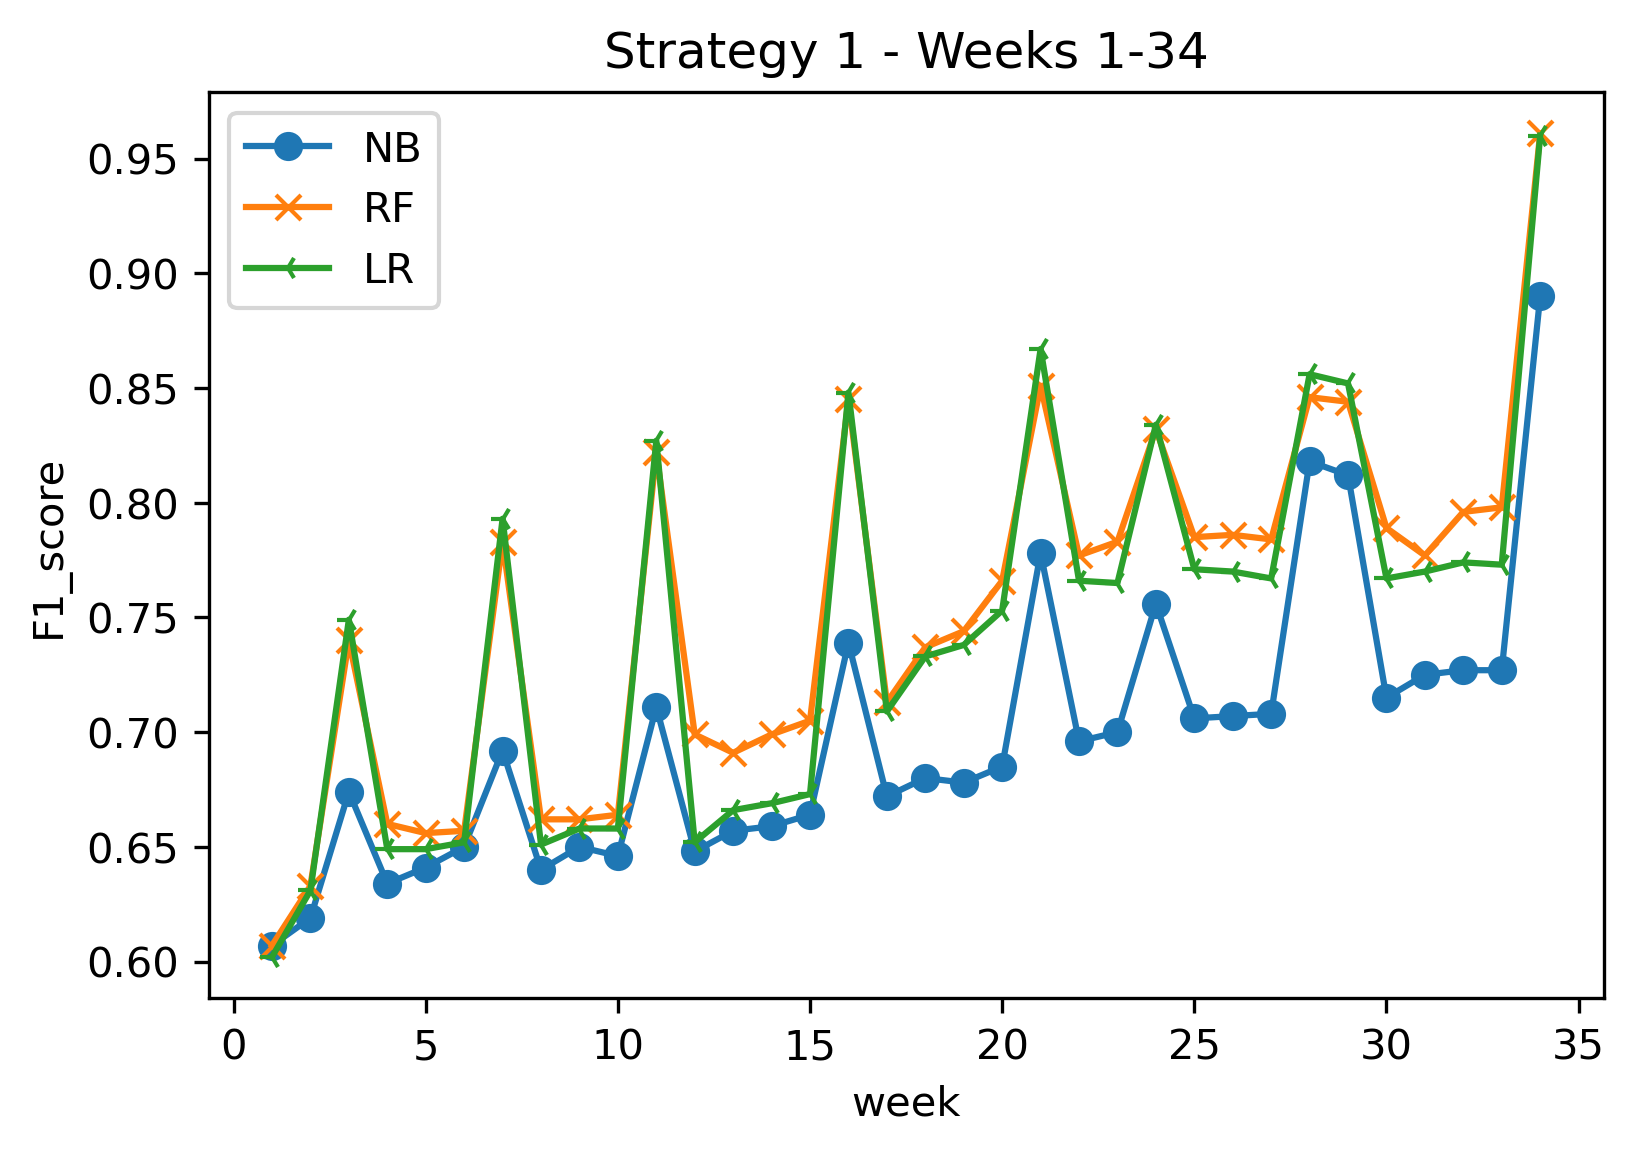

In [45]:
draw_res(acc_app1_df,'F1_score')

In [38]:
acc2_df,f2_df=get_results_dfs(df_approach2)

In [39]:
acc2_df.head(2)

,NB,RF,LR
1,0.607,0.603,0.602
2,0.619,0.636,0.631


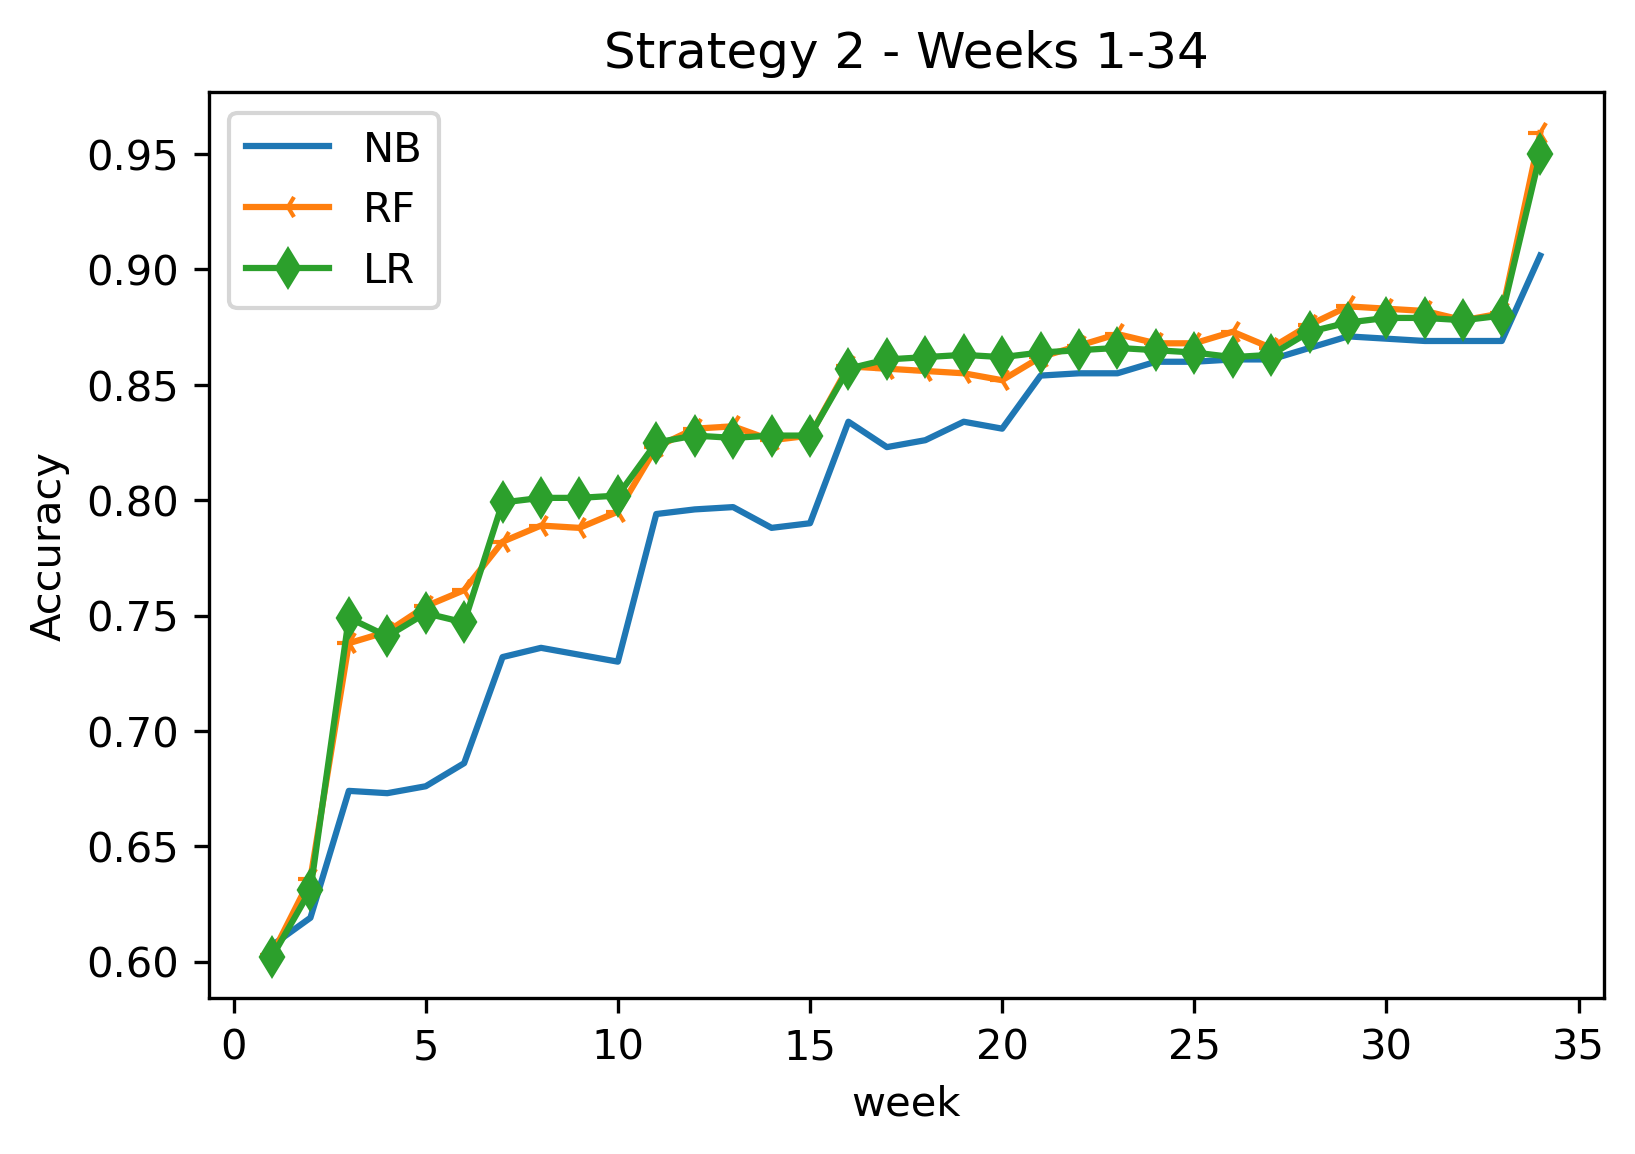

In [47]:
draw_res(acc2_df,'Accuracy',s=2)

In [40]:
f2_df.head(5)

,NB,RF,LR
1,0.696,0.638,0.694
2,0.712,0.679,0.717
3,0.745,0.767,0.768
4,0.742,0.769,0.758
5,0.743,0.781,0.767


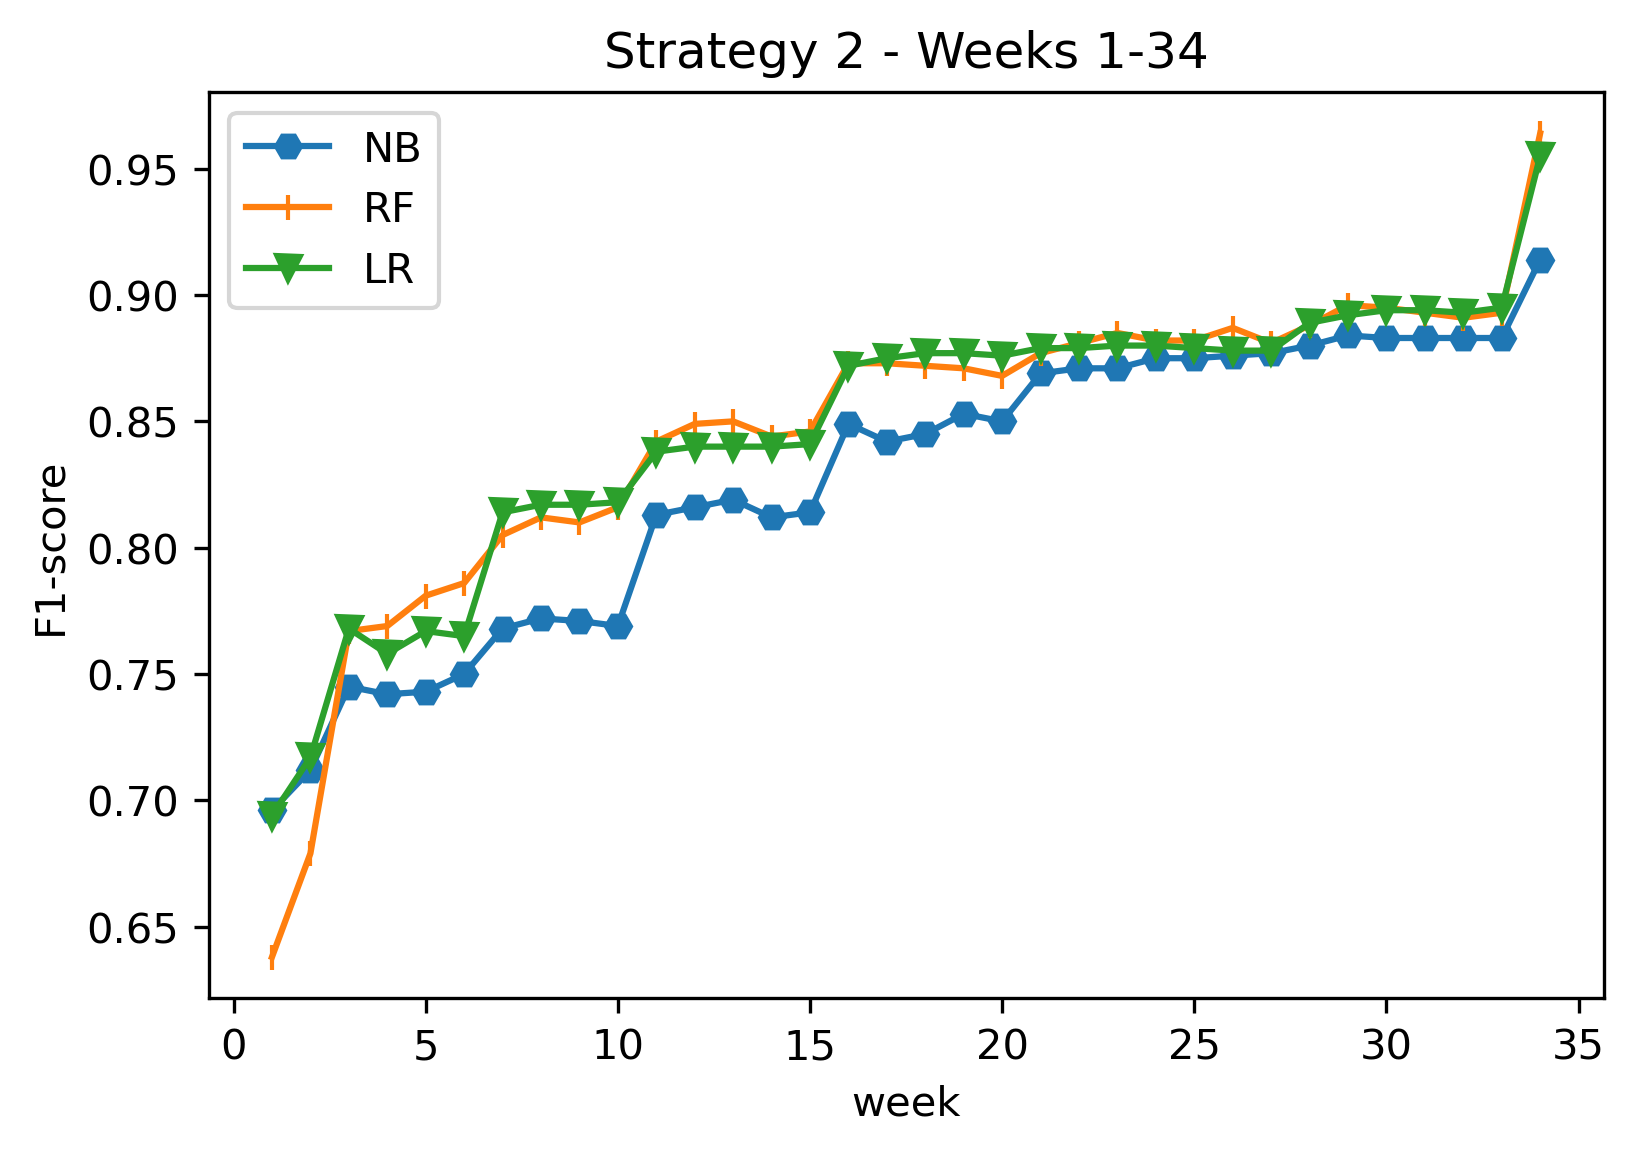

In [48]:
draw_res(f2_df,'F1-score',s=2)

In [49]:
#save dataframes
acc_app1_df.to_csv('approach1_acc.csv')
f1_app1_df.to_csv('approach1_f1.csv')
acc2_df.to_csv('approach2_acc.csv')
f2_df.to_csv('approach2_f1.csv')

In [51]:
#path='C:\\Users\\ELTE IK EFOP\\Desktop\\myresearch\\edm\\d13b\\demo_vle_assessments\\'
#path='C:\\Users\\ELTE IK EFOP\\Desktop\\myresearch\\edm\\d13b\\demo_vle_assessments\\'
path1='C:\\Users\\ELTE IK EFOP\\Desktop\\myresearch\\edm\\at-risk prediction\\weeks dafa\\approach1\\'
path2='C:\\Users\\ELTE IK EFOP\\Desktop\\myresearch\\edm\\at-risk prediction\\weeks dafa\\approach2\\'

#for key in demo_vle_assessments_df.keys():
for k in range(1,35):
    fn='week'+str(k)+'.csv'
    df_approach1[k].to_csv(path1+fn)
    df_approach2[k].to_csv(path2+fn)
    #demo_vle_assessments_df[key].to_csv(path+fn)